In [1]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

Using TensorFlow backend.


Initialized TensorFlow


### Fixed single Boston experiment for all dataset as points

In [2]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [3]:
repetitions = 10
Ns = np.arange(5, 1000, 200)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 50


In [4]:
def run_for_N(N = 50):
    """ Train a network with given h1 size and compute mean FT variance """
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 500, do_print = 'plot')

    # obtaining data points
    data = exp.get_inputs(50)

    # obtaining errors and bounds for data points
    rmean, rstd = exp.run(data, repetitions = 10000)

    return np.mean(rstd['experiment'] ** 2)

  0%|          | 0/5 [00:00<?, ?it/s]

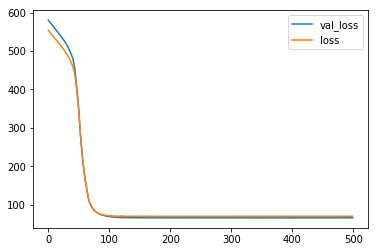

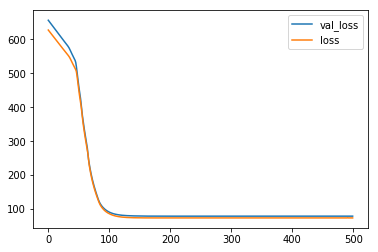

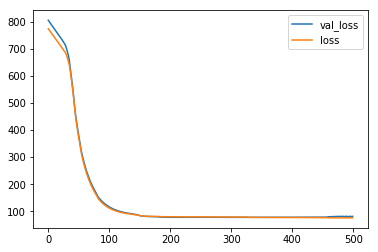

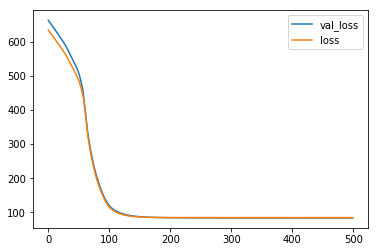

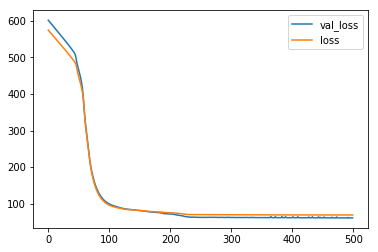

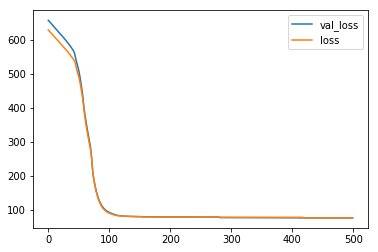

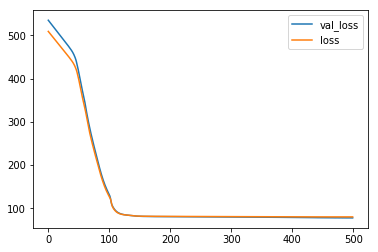

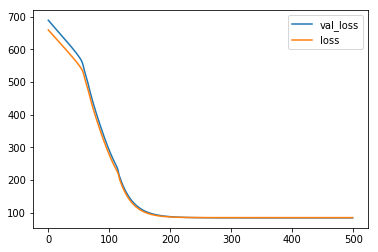

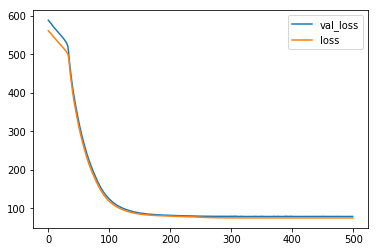

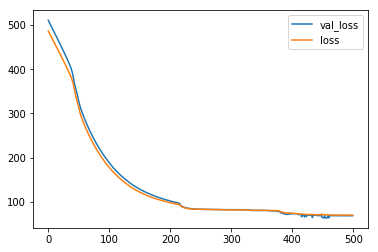

 20%|██        | 1/5 [01:14<04:58, 74.63s/it]

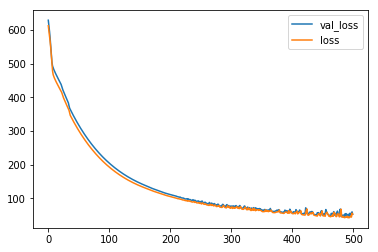

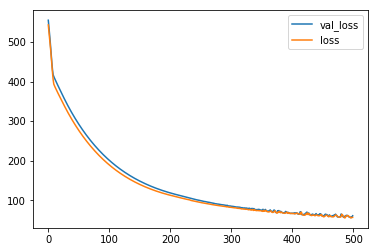

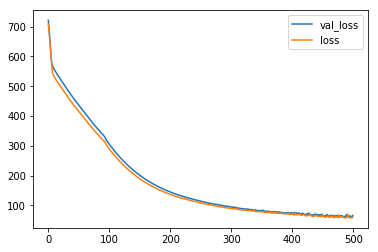

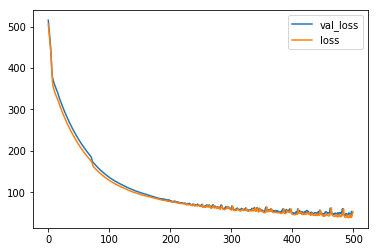

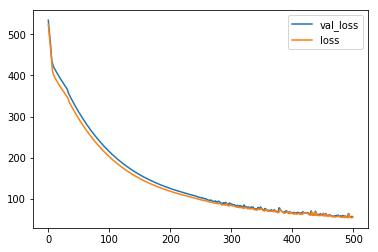

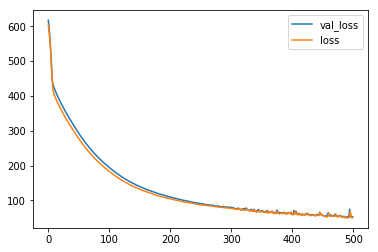

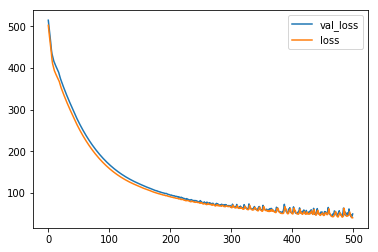

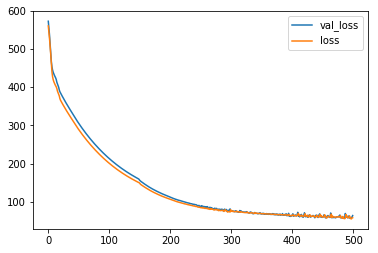

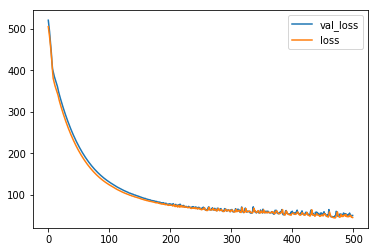

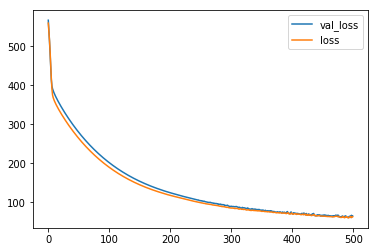

 40%|████      | 2/5 [04:45<05:46, 115.52s/it]

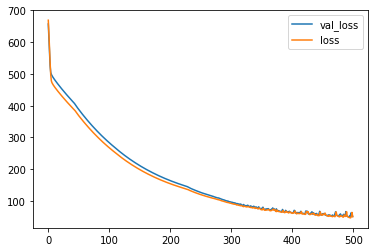

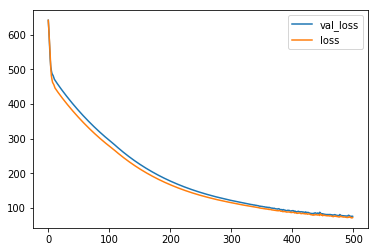

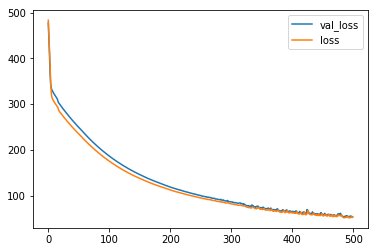

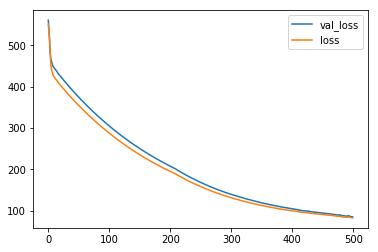

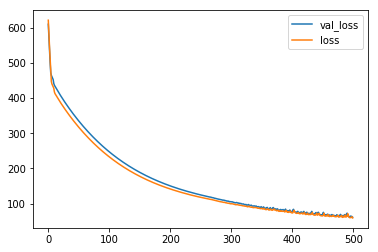

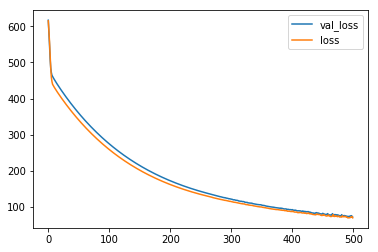

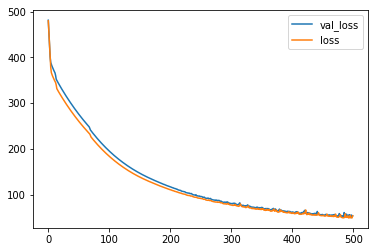

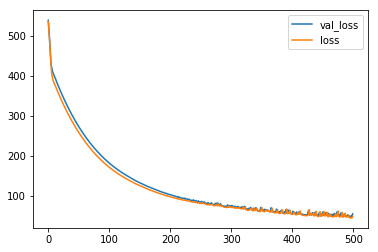

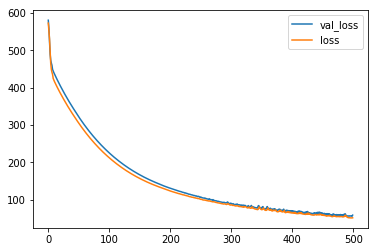

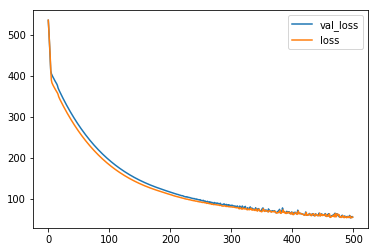

 60%|██████    | 3/5 [13:11<07:45, 232.60s/it]

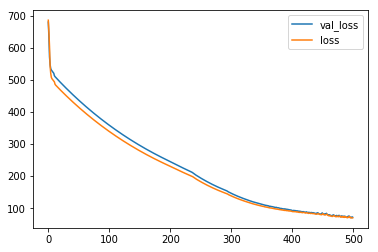

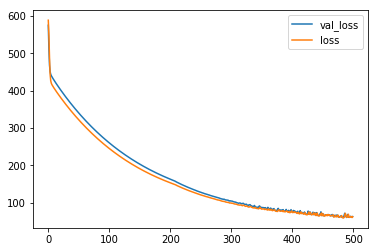

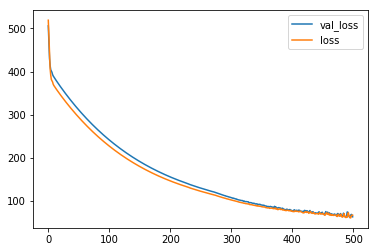

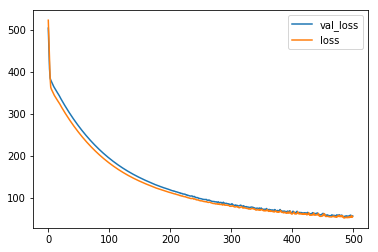

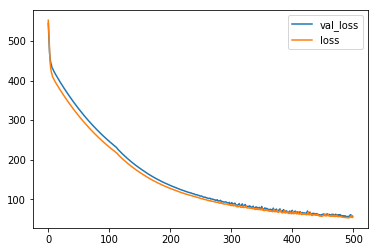

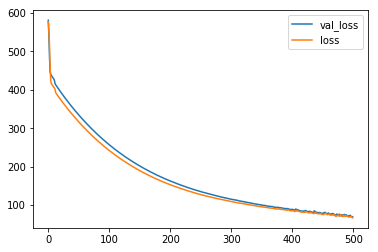

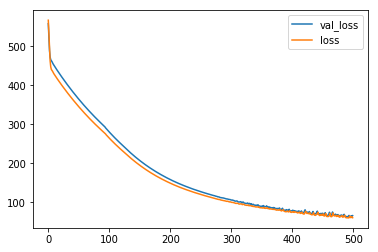

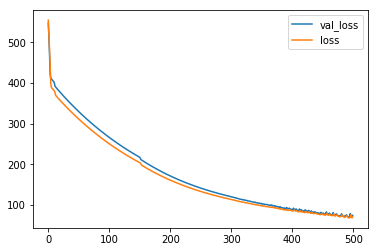

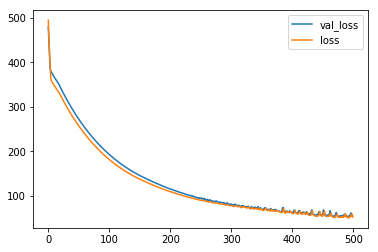

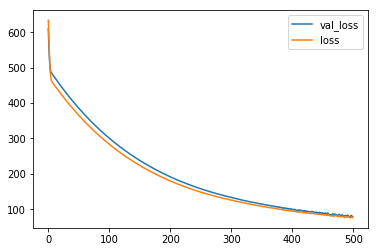

 80%|████████  | 4/5 [28:31<07:18, 438.72s/it]

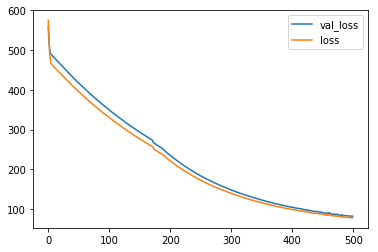

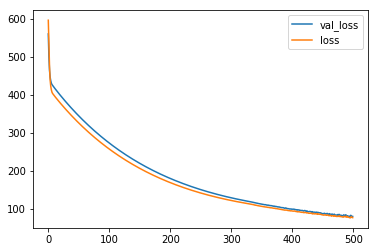

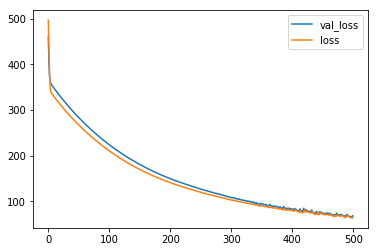

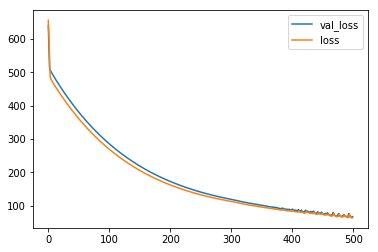

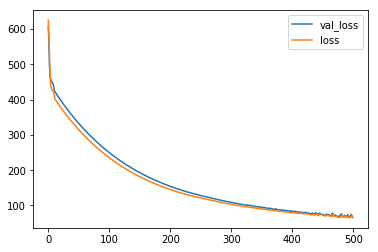

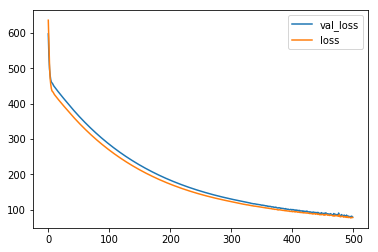

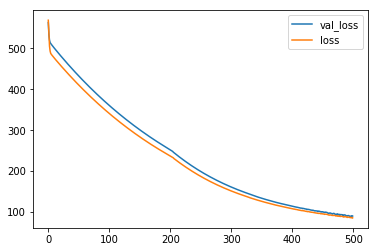

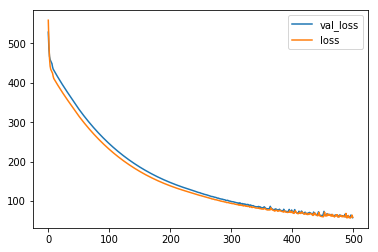

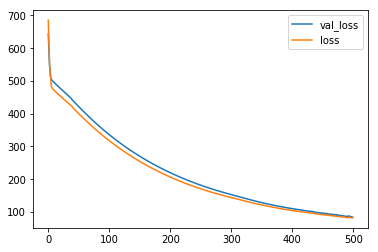

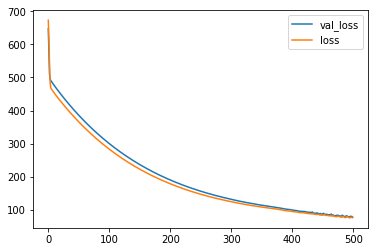

100%|██████████| 5/5 [53:30<00:00, 757.07s/it]


In [5]:
results = [[run_for_N(N) for _ in range(repetitions)] for N in tqdm(Ns)]

In [7]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


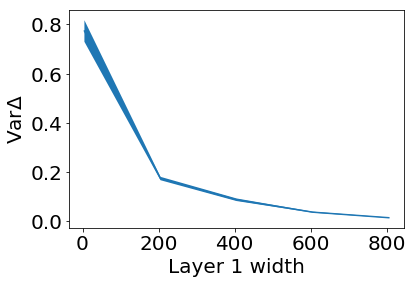

In [8]:
mean = np.mean(results, axis = 1)
std = np.std(results, axis = 1) / len(results[0])
plt.figure()
plt.xlabel('Layer 1 width')
plt.ylabel('Var$\Delta$')
plt.plot(Ns, mean)
plt.fill_between(Ns, mean - std, mean + std)
plt.savefig('figures/comparison_architecture_boston.eps', bbox_inches = 'tight')
plt.show()

In [9]:
# fitting line to logarithmic plot
np.polyfit(Ns, np.log(mean), 1)

array([-0.00470847, -0.47623562])

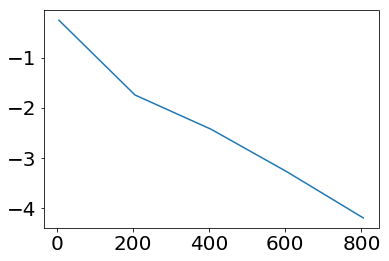

In [10]:
# logarithmic plot
plt.plot(Ns, np.log(mean))

The issue might be that networks do not converge to the same thing (no mean-field limi)